<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 1</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.1**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
<center>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm

<center>

## Integratore di Eulero

L'algoritmo più semplice per la risoluzione delle equazioni di Newton è l'algoritmo di Eulero, che consiste nell'effettuare un'espansione di Taylor al primo ordine delle posizioni e delle velocità entrambe centrate in $t$. Abbiamo allora che

$$
\vec{r_i}\left(t+\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,+\,\frac{d\vec{r_i}\left(t\right)}{dt}\Delta t\,+\,\mathcal{O}(\Delta t^2)
$$

$$
\vec{v_i}\left(t+\Delta t\right)\,=\,\vec{v_i}\left(t\right)\,+\,\frac{d\vec{v_i}\left(t\right)}{dt}\Delta t\,+\,\mathcal{O}(\Delta t^2)
$$

dove l'indice i si riferisce all'i-esima particella costituente il sistema. Tali equazioni possono essere espresse in modo leggermente differente sfruttando la definizione di velocità ed il secondo principio della dinamica, ottenendo come

$$
\vec{r_i}\left(t+\Delta t\right)\,=\,\vec{r_i}\left(t\right)\,+\,\vec{v_i}\left(t\right)\Delta t
$$

$$
\vec{v_i}\left(t+\Delta t\right)\,=\,\vec{v_i}\left(t\right)\,+\,\frac{\vec{f_i}\left(t\right)}{m_i}\Delta t\,
$$

Abbiamo ottenuto un set di equazioni dove posizioni e velocità compaiono accoppiate fra loro, ma nel momento in cui sono note sia le $\vec{r_i}$ che le $\vec{v_i}$ ad un certo tempo è possibile calcolare tali quantità allo step successivo e proseguire in maniera iterativa. Una problematica dell'integratore di Eulero è che non è _simplettico_ e quindi non esiste un time-step abbastanza piccolo che consenta di conservare l'energia per una simulazione di lunghezza arbitraria. In particolare, è necessario un compromesso fra accuratezza del risultato computazionale e tempo d'esecuzione.

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 1.1</h1>

Lavoriamo con una catena di 12 masse collegate fra loro con delle molle, in modo tale da mettere in evidenza le limitazioni dell'algoritmo di Eulero. Inizialmente effettuiamo una simulazione con time-step 

$$
dt\,=\,10^{-3} 
$$

per mettere in evidenza come l'energia totale non sia costante durante la simulazione, ma anzi aumenti sensibilmente. 

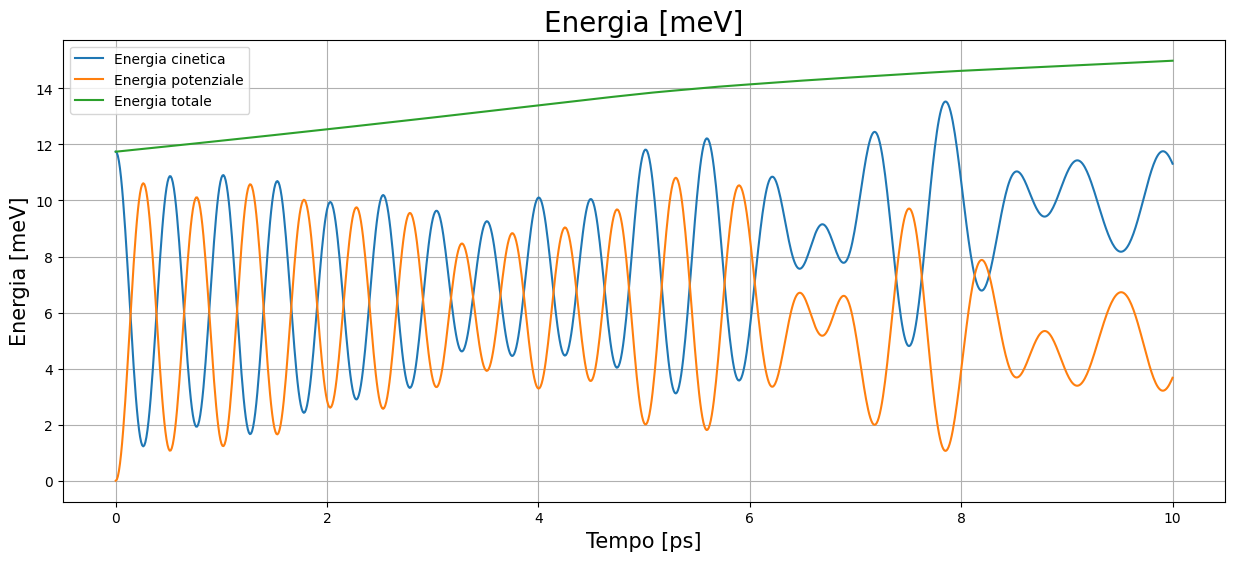

In [8]:
fig = plt.figure(figsize=(15, 6))
appo = np.loadtxt('noEnCons.1e-3.dat')

plt.plot(appo[:, 0], appo[:, 1], label = 'Energia cinetica')
plt.plot(appo[:, 0], appo[:, 2], label = 'Energia potenziale')
plt.plot(appo[:, 0], appo[:, 3], label = 'Energia totale')
plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Energia [meV]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()

Notiamo come l'energia totale non sia costante, ma aumenti durante la simulazione. Proviamo ora a variare l'intervallo temporale $dt$: dato che la parte trascurata nell'espansione di taylor arrestata al primo ordine è un o-grande di $\Delta t^2$, ci aspettiamo che diminuendo l'intervallo temporale, si riduca sensibilmente l'errore commesso sull'enenrgia totale. Questo è infatti quanto osserviamo lavorando con tre dt differenti, ossia

$$
\begin{cases}
\Delta t_1\,=\,10^{-3} \\
\Delta t_2\,=\,10^{-4} \\
\Delta t_3\,=\,10^{-5}
\end{cases}
$$

ottenendo risultati migliori al diminuire di $\Delta t$.

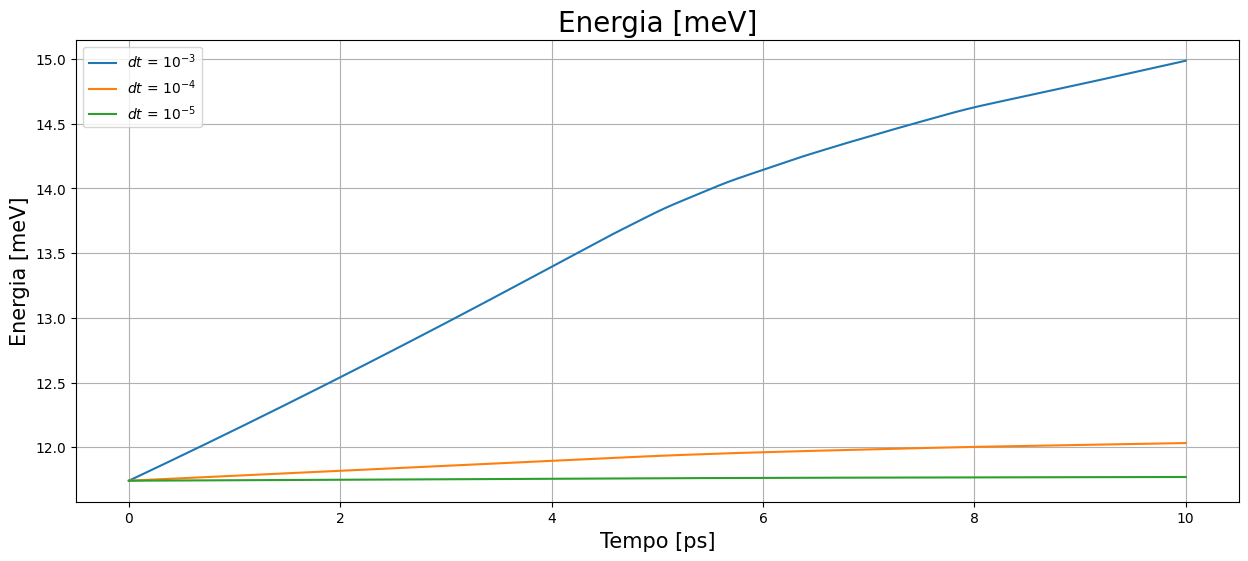

In [9]:
fig = plt.figure(figsize=(15, 6))
appo = np.loadtxt('noEnCons.1e-3.dat'); a = appo[:, 3]
appo = np.loadtxt('noEnCons.1e-4.dat'); b = appo[:, 3]
appo = np.loadtxt('noEnCons.1e-5.dat'); c = appo[:, 3]

plt.plot(appo[:, 0], a, label = r'$dt\,=\,10^{-3}$')
plt.plot(appo[:, 0], b, label = r'$dt\,=\,10^{-4}$')
plt.plot(appo[:, 0], c, label = r'$dt\,=\,10^{-5}$')
plt.ylabel(r"Energia [meV]", fontsize = 15)
plt.xlabel(r"Tempo [ps]", fontsize = 15)
plt.title(r"Energia [meV]", fontsize = 20)
plt.grid(True)
plt.legend(loc = 'best')

plt.show()